In [6]:
from __future__ import annotations

from pathlib import Path
import urllib.request

import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

In [9]:
# Approx Elephant Butte Reservoir coordinates
EB_LON = -107.184
EB_LAT = 33.338
CB_STATES_2024_URL = "https://www2.census.gov/geo/tiger/GENZ2024/shp/cb_2024_us_state_20m.zip"



In [10]:
def load_us_states(cb_url: str = CB_STATES_2024_URL) -> gpd.GeoDataFrame:
    """Load US states from a Census cartographic boundary zip (remote or local path)."""
    states = gpd.read_file(cb_url)
    # Ensure WGS84 for consistent lon/lat plotting
    if states.crs is None or states.crs.to_string() != "EPSG:4326":
        states = states.to_crs("EPSG:4326")
    return states

In [11]:
def get_state(states: gpd.GeoDataFrame, name: str = "New Mexico") -> gpd.GeoDataFrame:
    """Return a single-state GeoDataFrame."""
    # CB files typically use NAME
    col = "NAME" if "NAME" in states.columns else "name"
    return states[states[col] == name].copy()

In [12]:
def make_point_gdf(lon: float, lat: float, label: str = "Elephant Butte") -> gpd.GeoDataFrame:
    """Create a point GeoDataFrame in EPSG:4326."""
    return gpd.GeoDataFrame({"label": [label]}, geometry=[Point(lon, lat)], crs="EPSG:4326")


In [13]:
def plot_locator_map(
    states: gpd.GeoDataFrame,
    focus_state: gpd.GeoDataFrame,
    point: gpd.GeoDataFrame,
    *,
    title: str = "Elephant Butte Reservoir — New Mexico",
    figsize: tuple[int, int] = (6, 5),
    pad_frac: float = 0.25,
    show_label: bool = True,
    label_dx: float = 0.25,
    label_dy: float = 0.0,
):
    """Plot locator map and return (fig, ax) so you can preview before saving."""
    fig, ax = plt.subplots(figsize=figsize)

    # Context + highlight
    states.boundary.plot(ax=ax, linewidth=0.5)
    focus_state.boundary.plot(ax=ax, linewidth=2.0)

    # Marker
    point.plot(ax=ax, markersize=60)

    # Optional label
    if show_label:
        lon = float(point.geometry.iloc[0].x)
        lat = float(point.geometry.iloc[0].y)
        ax.text(lon + label_dx, lat + label_dy, point["label"].iloc[0], fontsize=9)

    # Zoom to state with padding
    minx, miny, maxx, maxy = focus_state.total_bounds
    ax.set_xlim(minx - (maxx - minx) * pad_frac, maxx + (maxx - minx) * pad_frac)
    ax.set_ylim(miny - (maxy - miny) * pad_frac, maxy + (maxy - miny) * pad_frac)

    ax.set_title(title)
    ax.set_axis_off()
    plt.tight_layout()

    return fig, ax

In [14]:
def save_figure(fig, out_path: Path, dpi: int = 200) -> Path:
    """Save the current figure to disk."""
    out_path.parent.mkdir(parents=True, exist_ok=True)
    fig.savefig(out_path, dpi=dpi)
    return out_path

In [15]:
states = load_us_states()
nm = get_state(states, "New Mexico")
pt = make_point_gdf(EB_LON, EB_LAT, "Elephant Butte")


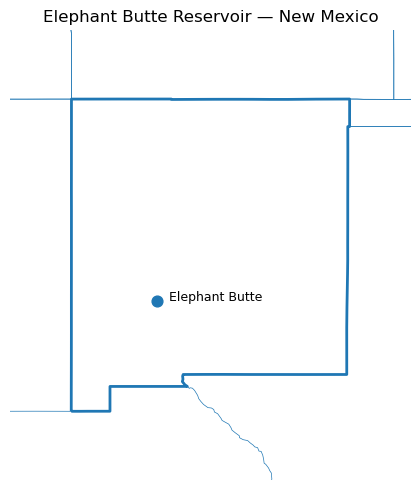

In [16]:
fig, ax = plot_locator_map(
    states, nm, pt,
    pad_frac=0.22,
    show_label=True,
    label_dx=0.25,
)
plt.show()


In [17]:
repo_root = Path(r"C:\GIS\my_water_projects\openwater-shrinking-lake-monitor")
out_png = repo_root / "outputs" / "figures" / "locator_elephant_butte_nm.png"
save_figure(fig, out_png, dpi=200)
print("✅ Saved:", out_png)


✅ Saved: C:\GIS\my_water_projects\openwater-shrinking-lake-monitor\outputs\figures\locator_elephant_butte_nm.png
